# Project: Investigate The Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Here I have import statements that I would be using throughout the project.

In [1]:
# Import statements

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> Here I will read the csv file and use **df.head()**, **df.info()**, **df.shape** to understand the dataset and to check what should be done to clean it.

### General Properties

In [3]:
df = pd.read_csv('tmdb_movies_data.csv')

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.shape

(10866, 21)

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
df.duplicated().sum()

1

> **From the steps above, this is what I would be doing:**

> 1- **Drop columns** that are not needed for this analysis ('homepage', 'tagline', 'keywords', 'overview', 'release_date')

> 2- Replace all 0's to **NaN**, in columns 'budget', 'revenue', 'runtime'

> 3- Drop **null** values 

> 4- We have one **duplicate** value that will also be dropped

> 5- Add new column for **profit** & **profit_adj** (revenue - budget)

# Data Cleaning

### 1- Drop columns that will not be used

In [8]:
df.drop(['homepage', 'tagline', 'keywords', 'overview', 'release_date'], axis=1, inplace=True)

### 2- Replace all 0 values to NaN 

In [9]:
df['budget'] = df['budget'].replace(0, np.NaN)
df['runtime'] = df['runtime'].replace(0, np.NaN)
df['revenue'] = df['revenue'].replace(0, np.NaN)

### 3- Drop null values

In [10]:
df.dropna(inplace=True)

### 4- Drop duplicates

In [11]:
df.drop_duplicates(inplace=True)

### 5- Add profit & profit_adj columns

In [12]:
df.insert(5, 'profit', df['revenue'] - df['budget'])

df.insert(14, 'profit_adj', df['revenue'] - df['budget'])

In [13]:
(df['profit'] == df['profit_adj']).value_counts()

True    3805
dtype: int64

> Since **'profit'** & **'profit_adj'** are the same, 'profit_adj' will be dropped along with 'budget_adj' & 'revenue_adj'

In [14]:
df.drop(['budget_adj', 'revenue_adj', 'profit_adj'], axis=1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3805 non-null   int64  
 1   imdb_id               3805 non-null   object 
 2   popularity            3805 non-null   float64
 3   budget                3805 non-null   float64
 4   revenue               3805 non-null   float64
 5   profit                3805 non-null   float64
 6   original_title        3805 non-null   object 
 7   cast                  3805 non-null   object 
 8   director              3805 non-null   object 
 9   runtime               3805 non-null   float64
 10  genres                3805 non-null   object 
 11  production_companies  3805 non-null   object 
 12  vote_count            3805 non-null   int64  
 13  vote_average          3805 non-null   float64
 14  release_year          3805 non-null   int64  
dtypes: float64(6), int64

> The dataset is now ready, I lost almost a third of the dataset during the cleaning process. I am now left with **3805 rows** and **15 columns**

In [16]:
df.describe()

,id,popularity,budget,revenue,profit,runtime,vote_count,vote_average,release_year
count,3805.000000,3805.000000,3.805000e+03,3.805000e+03,3.805000e+03,3805.000000,3805.000000,3805.000000,3805.000000
mean,40040.372668,1.203784,3.760800e+07,1.089734e+08,7.136540e+07,109.351117,534.159001,6.170565,2001.229172
std,67585.708616,1.480569,4.232179e+07,1.772976e+08,1.513764e+08,19.845678,883.757588,0.792437,11.329616
min,5.000000,0.010335,1.000000e+00,2.000000e+00,-4.139124e+08,15.000000,10.000000,2.200000,1960.000000
25%,5925.000000,0.470651,1.000000e+07,1.433379e+07,-1.173477e+06,96.000000,74.000000,5.700000,1995.000000
50%,11253.000000,0.810805,2.500000e+07,4.621664e+07,2.047434e+07,106.000000,209.000000,6.200000,2004.000000
75%,38579.000000,1.387163,5.000000e+07,1.260695e+08,8.347333e+07,119.000000,584.000000,6.700000,2010.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,2.544506e+09,338.000000,9767.000000,8.400000,2015.000000


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: What are the most popular movies?

In [17]:
df['popularity'].describe()

count    3805.000000
mean        1.203784
std         1.480569
min         0.010335
25%         0.470651
50%         0.810805
75%         1.387163
max        32.985763
Name: popularity, dtype: float64

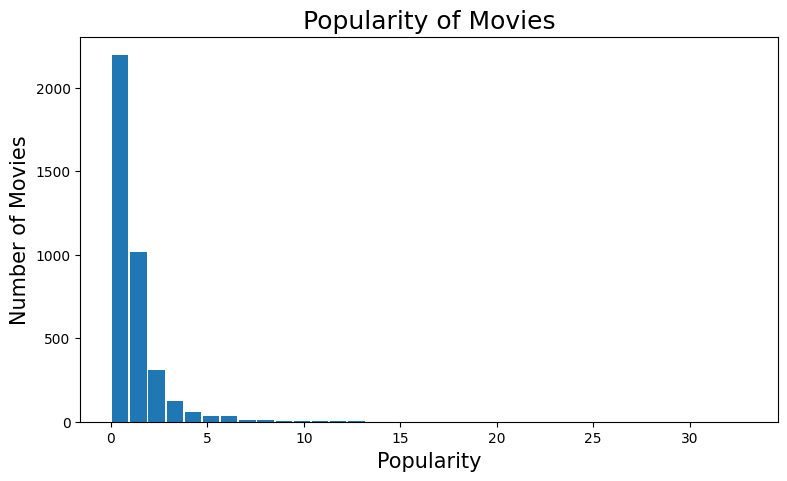

In [18]:
plt.figure(figsize=(9,5), dpi = 100)
plt.title('Popularity of Movies', fontsize=18)
plt.xlabel('Popularity', fontsize=15)
plt.ylabel('Number of Movies', fontsize=15)
plt.hist(df['popularity'], rwidth = 0.9, bins =35);

> It appears that most of the movies have a **popularity of around 1 and less**. The max value is **32**, I need to investigate this more

> I will check movies of **popularity that exceeds 10**

In [19]:
df[df['popularity'] > 10]

,id,imdb_id,popularity,budget,revenue,profit,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,2.284364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,1.852382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,1.868178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015
629,157336,tt0816692,24.949134,165000000.0,6.217525e+08,4.567525e+08,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,169.0,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,6498,8.0,2014
630,118340,tt2015381,14.311205,170000000.0,7.733124e+08,6.033124e+08,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,121.0,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,5612,7.9,2014
631,100402,tt1843866,12.971027,170000000.0,7.147666e+08,5.447666e+08,Captain America: The Winter Soldier,Chris Evans|Scarlett Johansson|Sebastian Stan|...,Joe Russo|Anthony Russo,136.0,Action|Adventure|Science Fiction,Marvel Studios,3848,7.6,2014
632,245891,tt2911666,11.422751,20000000.0,7.873990e+07,5.873990e+07,John Wick,Keanu Reeves|Michael Nyqvist|Alfie Allen|Wille...,Chad Stahelski|David Leitch,101.0,Action|Thriller,Thunder Road Pictures|Warner Bros.|87Eleven|De...,2712,7.0,2014
633,131631,tt1951265,10.739009,125000000.0,7.521002e+08,6.271002e+08,The Hunger Games: Mockingjay - Part 1,Jennifer Lawrence|Josh Hutcherson|Liam Hemswor...,Francis Lawrence,123.0,Science Fiction|Adventure|Thriller,Lionsgate|Color Force,3590,6.6,2014
634,122917,tt2310332,10.174599,250000000.0,9.551198e+08,7.051198e+08,The Hobbit: The Battle of the Five Armies,Martin Freeman|Ian McKellen|Richard Armitage|K...,Peter Jackson,144.0,Adventure|Fantasy,WingNut Films|New Line Cinema|3Foot7|Metro-Gol...,3110,7.1,2014


> Here we have **11 movies** with popularity that exceeds 10

> Does popularity affect **vote_average?**

In [20]:
df[['vote_count', 'vote_average']][df['popularity'] < df.popularity.mean()].describe()

,vote_count,vote_average
count,2618.000000,2618.000000
mean,193.149351,6.008136
std,275.945780,0.761867
min,10.000000,2.200000
25%,48.000000,5.500000
50%,115.000000,6.000000
75%,240.000000,6.600000
max,4368.000000,8.400000


In [21]:
df[['vote_count', 'vote_average']][df['popularity'] > df.popularity.mean()].describe()

,vote_count,vote_average
count,1187.000000,1187.000000
mean,1286.276327,6.528812
std,1230.531573,0.739351
min,10.000000,3.700000
25%,501.500000,6.000000
50%,857.000000,6.500000
75%,1655.500000,7.100000
max,9767.000000,8.400000


> It does seem the more popular movies get a higher score. But the **less popular** can still get high scores. And we don't know how popularity is calculated.

### Research Question 2: What are the most profitable & least profitable movies?

In [22]:
df[['original_title', 'profit']].sort_values(['profit'], ascending=False).head(5)

,original_title,profit
1386,Avatar,2.544506e+09
3,Star Wars: The Force Awakens,1.868178e+09
5231,Titanic,1.645034e+09
0,Jurassic World,1.363529e+09
4,Furious 7,1.316249e+09


In [23]:
df[['original_title', 'profit']].sort_values(['profit'], ascending=True).head(5)

,original_title,profit
2244,The Warrior's Way,-413912431.0
5508,The Lone Ranger,-165710090.0
7031,The Alamo,-119180039.0
3484,Mars Needs Moms,-111007242.0
4970,Brother Bear,-99999750.0


In [24]:
df[['original_title', 'profit']][df['profit'] > 0].sort_values(['profit'], ascending=True).head(5)

,original_title,profit
5852,Hross Ã­ oss,1.0
8235,Tales from the Hood,5.0
4675,Joyful Noise,5.0
8125,The Prophecy,8.0
10050,Tales from the Darkside: The Movie,13.0


> Values for the least profitable movies doesn't seem to be realistic, even when eliminating negative values. **I will investigate the most profitable movies**

In [25]:
most_profits = df[df['profit'] > df.profit.mean()]

most_profits.count()

id                      1061
imdb_id                 1061
popularity              1061
budget                  1061
revenue                 1061
profit                  1061
original_title          1061
cast                    1061
director                1061
runtime                 1061
genres                  1061
production_companies    1061
vote_count              1061
vote_average            1061
release_year            1061
dtype: int64

> The most profitable movies only have **1061 rows**.

In [26]:
df['budget'].describe()

count    3.805000e+03
mean     3.760800e+07
std      4.232179e+07
min      1.000000e+00
25%      1.000000e+07
50%      2.500000e+07
75%      5.000000e+07
max      4.250000e+08
Name: budget, dtype: float64

In [27]:
most_profits['budget'].describe()

count    1.061000e+03
mean     6.658046e+07
std      5.556387e+07
min      1.130000e+02
25%      2.500000e+07
50%      5.000000e+07
75%      9.000000e+07
max      3.800000e+08
Name: budget, dtype: float64

> The most profitable movies also have a **higher budget on average**.

> **Next,** I will look into **actors** and **production companies**

In [28]:
#This function extracts data from columns that have '|' as a separator

def extract_data(column):
    data = most_profits[column].str.cat(sep='|')
    data = pd.Series(data.split('|'))
    data = data.value_counts(ascending=False)
    
    return data

In [29]:
actors = extract_data('cast')

actors.head(5)

Tom Cruise            26
Sylvester Stallone    20
Brad Pitt             20
Tom Hanks             20
Cameron Diaz          18
dtype: int64

> These 5 **actors** are the most popular in the most profitable movies.

In [30]:
companies = extract_data('production_companies')

companies.head(5)

Universal Pictures                        131
Warner Bros.                              119
Paramount Pictures                        107
Twentieth Century Fox Film Corporation    102
Columbia Pictures                          73
dtype: int64

> 'Universal Pictures' followed by 'Warner Bros.' participated in the making of the most profitable movies.

### Research Question 3: In what year movies made the most profits?

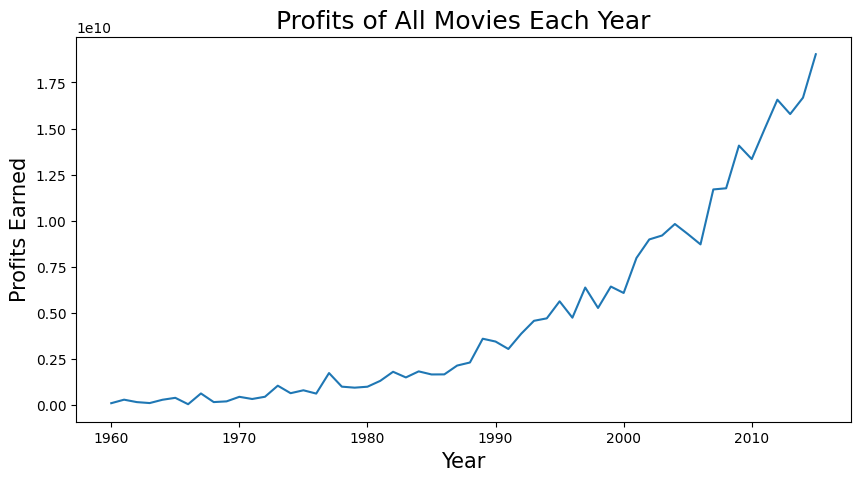

In [31]:
profits_by_year = df.groupby('release_year')['profit'].sum()

plt.figure(figsize=(10,5), dpi = 100)
plt.title('Profits of All Movies Each Year', fontsize=18)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Profits Earned', fontsize=15)
plt.plot(profits_by_year);

In [32]:
profits_by_year.idxmax()

2015

> It looks like movies made the most profits in **2015**.

### Research Question 5: What are the most popular genres?

In [33]:
genres = extract_data('genres')

genres.head()

Comedy       384
Action       382
Drama        365
Adventure    321
Thriller     308
dtype: int64

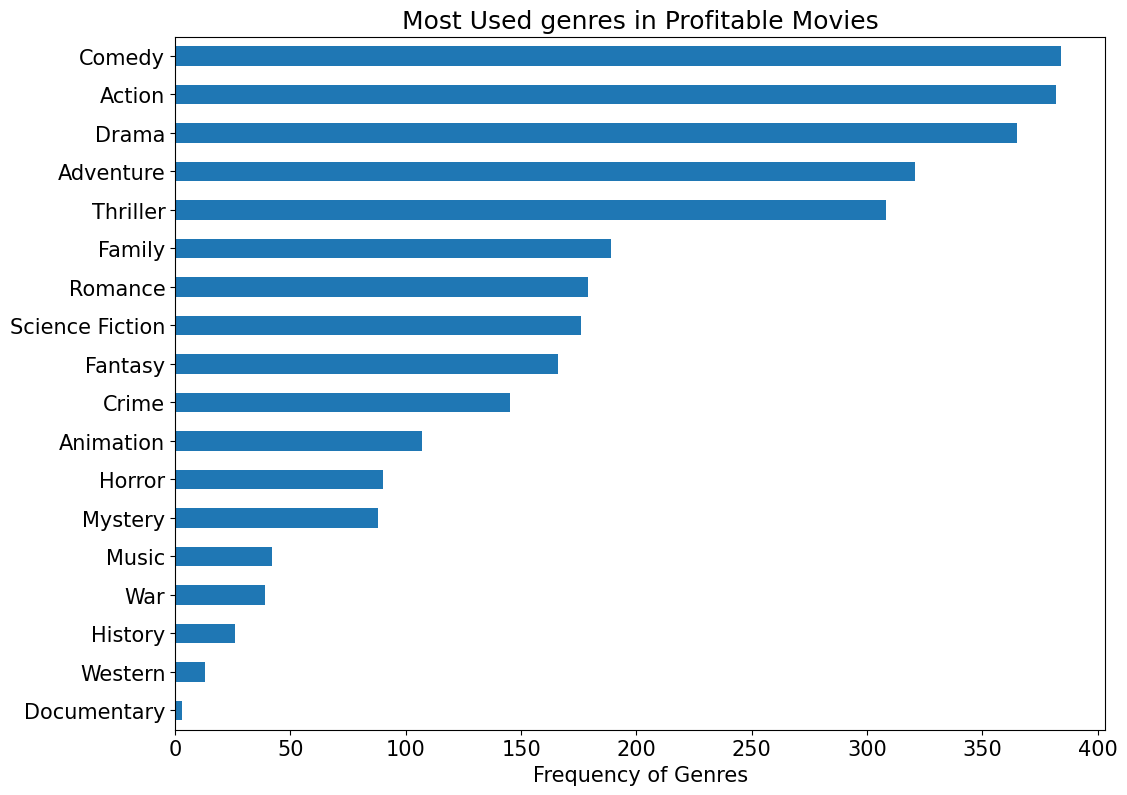

In [34]:
genres.sort_values(ascending=True, inplace=True)

genres.plot.barh(color='C0', fontsize=15).figure.set_size_inches(12, 9);
plt.title('Most Used genres in Profitable Movies', fontsize=18)
plt.xlabel('Frequency of Genres', fontsize=15)
plt.show();

> From here we can conclude that  **'Comedy', 'Action', 'Drama', 'Adventure', 'Thriller'**  are the most popular genres in movies.

<a id='conclusions'></a>
## Conclusions

From the analysis done above 

**For a movie to be considered successful and generate high profit, it should have:**
- An Average budget of 50 Million Dollars.
- One of the well known actors including, Tom Cruise, Brad Pitt, Sylvester Stallone, Tom Hanks, Adam Sandler.
- One of these companies participate in making the movie (Universal Pictures, Warner Bros., Paramount Pictures, Twentieth Century Fox Film Corporation, Columbia Pictures).
- Include one or more of there genres (Comedy, Action, Drama, Adventure, Thriller).

**Final Observation:** 
Although we got some great insights but there were some limitations

- The dataset is very small.
- 'budget' & 'revenue' had many missing or unrealistic values (It might be even in different currencies) 
- Null values accounted to almost two thirds of the data, dropping them affected the analysis.
- The dataset might not be up to date.